In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [4]:
file_sy_list

['../sample_synthetic/samples_ldm_3_no-spectral_sleep_edfx/psd_list_446.npy',
 '../sample_synthetic/samples_ldm_3_no-spectral_sleep_edfx/psd_list_437.npy',
 '../sample_synthetic/samples_ldm_3_no-spectral_sleep_edfx/psd_list_868.npy',
 '../sample_synthetic/samples_ldm_3_no-spectral_sleep_edfx/psd_list_100.npy',
 '../sample_synthetic/samples_ldm_3_no-spectral_sleep_edfx/psd_list_312.npy',
 '../sample_synthetic/samples_ldm_3_no-spectral_sleep_edfx/psd_list_129.npy',
 '../sample_synthetic/samples_ldm_3_no-spectral_sleep_edfx/psd_list_504.npy',
 '../sample_synthetic/samples_ldm_3_no-spectral_sleep_edfx/psd_list_720.npy',
 '../sample_synthetic/samples_ldm_3_no-spectral_sleep_edfx/psd_list_902.npy',
 '../sample_synthetic/samples_ldm_3_no-spectral_sleep_edfx/psd_list_616.npy',
 '../sample_synthetic/samples_ldm_3_no-spectral_sleep_edfx/psd_list_75.npy',
 '../sample_synthetic/samples_ldm_3_no-spectral_sleep_edfx/psd_list_822.npy',
 '../sample_synthetic/samples_ldm_3_no-spectral_sleep_edfx/psd_li

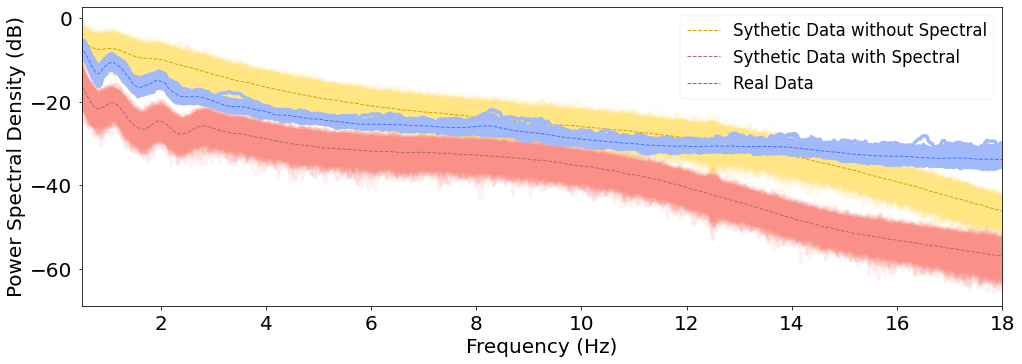

In [ ]:
#sns.set(font_scale=1)
multipler=3
FONTSIZE = 8*multipler
# A4 width: 6.3 inches 2*1.25 margins --> 5.8 figures
W = 5.5*multipler


def setup_style(grid=False, column_fig=False):
    plt.style.use('seaborn-v0_8-paper')

    if column_fig:
        plt.rcParams["figure.figsize"] = (W, W / 1.7)
    else:
        plt.rcParams["figure.figsize"] = (W, W / 3)
    plt.rcParams["axes.grid"] = grid
    fontsize = FONTSIZE * 2 if column_fig else FONTSIZE
    lw = 15 if column_fig else 0.5
    plt.rcParams.update({
        'font.size': fontsize,
        'legend.fontsize': 'x-small',
        'axes.labelsize': 'small',
        'xtick.labelsize': 'small',
        'ytick.labelsize': 'small',
        'axes.titlesize': 'medium',
        'lines.linewidth': lw,
    })

setup_style()

from glob import glob
file_sy_list = glob("../sample_synthetic/samples_ldm_3_no-spectral_sleep_edfx/psd_list_*.npy", )

n_array = [np.load(file, allow_pickle=True) for file in file_sy_list]


fig, ax = plt.subplots()

acc_freqs = []
acc_psds = []
for data in n_array:
    freqs = data[1]
    acc_freqs.append(freqs)
    psds_mean = data[2]
    acc_psds.append(psds_mean)

    ax.plot(freqs, psds_mean, color="#FFE682", alpha=0.1, linewidth=3.25)

ax.plot(freqs, np.mean(acc_psds, axis=0), color='#D9A404', linewidth=1,linestyle='--', label="Sythetic Data without Spectral")


from glob import glob
file_sy_list = glob("../sample_synthetic/samples_ldm_3_spectral_sleep_edfx/psd_list_*.npy", )

n_array = [np.load(file, allow_pickle=True) for file in file_sy_list]


acc_freqs = []
acc_psds = []
for data in n_array:
    freqs = data[1]
    acc_freqs.append(freqs)
    psds_mean = data[2]
    acc_psds.append(psds_mean)

    ax.plot(freqs, psds_mean, color="#FA9189", alpha=0.1, linewidth=3.25)

ax.plot(freqs, np.mean(acc_psds, axis=0), color='#AD6D68', linewidth=1,linestyle='--', label="Sythetic Data with Spectral")


array = np.load("../samples/samples_edfx_double/psd_list.npy",allow_pickle=True)
acc_freqs = []
acc_psds = []
for data in array:
    freqs = data[1]
    acc_freqs.append(freqs)
    psds_mean = data[2]
    acc_psds.append(psds_mean)

    ax.plot(freqs, psds_mean, color="#A3BAFA", alpha=1, linewidth=3.5)

ax.plot(freqs, np.mean(acc_psds, axis=0), color='#4277FF', linewidth=1,linestyle='--', label="Real Data")



ax.set(
    xlabel="Frequency (Hz)",
    ylabel="Power Spectral Density (dB)",
)


ax.set_facecolor("white")

plt.legend()
plt.xlim(0.5, 18)

plt.savefig("temp_fig_.pdf", dpi=300)
